In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
products = pd.read_csv('ab_products.csv')
products.head()

,product_id,name,price
0,1,сахар,150.0
1,2,чай зеленый в пакетиках,50.0
2,3,вода негазированная,80.4
3,4,леденцы,45.5
4,5,кофе 3 в 1,15.0


In [3]:
orders = pd.read_csv('ab_orders.csv')
orders

,order_id,creation_time,product_ids
0,1255,2022-08-26 00:00:19.000000,"{75, 22, 53, 84}"
1,1256,2022-08-26 00:02:21.000000,"{56, 76, 39}"
2,1257,2022-08-26 00:02:27.000000,"{76, 34, 41, 38}"
3,1258,2022-08-26 00:02:56.000000,"{74, 6}"
4,1259,2022-08-26 00:03:37.000000,"{20, 45, 67, 26}"
...,...,...,...
4118,59422,2022-09-08 23:13:03.000000,"{84, 8, 24}"
4119,59439,2022-09-08 23:18:05.000000,"{9, 25, 75, 30, 6}"
4120,59464,2022-09-08 23:22:27.000000,"{60, 41, 46}"
4121,59487,2022-09-08 23:29:06.000000,"{9, 62, 77}"


In [4]:
users = pd.read_csv('ab_users_data.csv')
users

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37.000000,2022-08-26,1
...,...,...,...,...,...,...
4332,990,59422,create_order,2022-09-08 23:13:03.000000,2022-09-08,1
4333,1418,59439,create_order,2022-09-08 23:18:05.000000,2022-09-08,1
4334,1605,59464,create_order,2022-09-08 23:22:27.000000,2022-09-08,0
4335,1461,59487,create_order,2022-09-08 23:29:06.000000,2022-09-08,0


In [6]:
users.order_id = users.order_id.drop_duplicates(keep = False)
users = users.dropna()
# Для начала удалим заказы, которые были отменены (это дублирующиеся строки по order_id)

In [7]:
orders_users = orders.merge(users, on = 'order_id')
# Соединим датафреймы

In [8]:
orders_users['product_ids'] = orders_users['product_ids'].apply(lambda x: x[1:-1].split(', '))
df_split = orders_users.explode('product_ids')
# Разделим список product_id на отдельные строки

In [9]:
df_split = df_split.rename(columns={"product_ids": "product_id"})
# Переименуем колонку, чтобы смерджить дф-мы

In [10]:
df_split.dtypes

order_id          int64
creation_time    object
product_id       object
user_id           int64
action           object
time             object
date             object
group             int64
dtype: object

In [11]:
products.dtypes

product_id      int64
name           object
price         float64
dtype: object

In [12]:
df_split['product_id'] = df_split['product_id'].astype(int)
# Прведем колонку product_id к int для мёрджа

In [13]:
orders_users_products = df_split.merge(products, on = 'product_id')

In [14]:
orders_users_products

,order_id,creation_time,product_id,user_id,action,time,date,group,name,price
0,1255,2022-08-26 00:00:19.000000,75,964,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,сок ананасовый,120.0
1,1287,2022-08-26 00:31:36.000000,75,987,create_order,2022-08-26 00:31:36.000000,2022-08-26,0,сок ананасовый,120.0
2,1403,2022-08-26 03:01:40.000000,75,1073,create_order,2022-08-26 03:01:40.000000,2022-08-26,1,сок ананасовый,120.0
3,1424,2022-08-26 04:01:22.000000,75,1089,create_order,2022-08-26 04:01:22.000000,2022-08-26,1,сок ананасовый,120.0
4,1495,2022-08-26 06:04:05.000000,75,1139,create_order,2022-08-26 06:04:05.000000,2022-08-26,1,сок ананасовый,120.0
...,...,...,...,...,...,...,...,...,...,...
13078,33910,2022-09-03 23:46:53.000000,11,1883,create_order,2022-09-03 23:46:53.000000,2022-09-03,1,масло льняное,200.0
13079,34742,2022-09-04 03:41:52.000000,11,1440,create_order,2022-09-04 03:41:52.000000,2022-09-04,0,масло льняное,200.0
13080,41998,2022-09-05 10:26:46.000000,11,1813,create_order,2022-09-05 10:26:46.000000,2022-09-05,1,масло льняное,200.0
13081,53851,2022-09-07 23:53:54.000000,11,1175,create_order,2022-09-07 23:53:54.000000,2022-09-07,0,масло льняное,200.0


In [15]:
sum_check_gr0 = orders_users_products.query('group == "0"') \
.groupby('user_id', as_index = False) \
.agg({'price' : 'sum'})
sum_check_gr0
# Создадим дф-мы для обеих групп, где посчитаем для каждого пользователя сумму покупок

,user_id,price
0,964,718.9
1,968,1590.7
2,969,681.9
3,972,546.4
4,975,1432.9
...,...,...
507,1971,1680.5
508,1972,1439.1
509,1973,801.9
510,1974,1224.6


In [16]:
sum_check_gr1 = orders_users_products.query('group == "1"') \
.groupby('user_id', as_index = False) \
.agg({'price' : 'sum'})
sum_check_gr1

,user_id,price
0,965,4155.5
1,967,1137.4
2,970,802.8
3,971,1968.4
4,973,1285.8
...,...,...
496,1976,2001.9
497,1977,781.2
498,1978,2276.3
499,1979,1907.1


In [17]:
sum_check_gr0.describe()
# посмотрим на описательную статистику в группах

,user_id,price
count,512.000000,512.000000
mean,1480.130859,1139.562305
std,295.679807,809.808924
min,964.000000,25.000000
25%,1225.500000,571.700000
50%,1470.500000,955.700000
75%,1736.250000,1498.600000
max,1975.000000,5589.800000


In [18]:
sum_check_gr1.describe()
# Видим, что в группе 1 среднее больше

,user_id,price
count,501.000000,501.000000
mean,1465.173653,1753.749301
std,290.914681,928.760937
min,965.000000,83.500000
25%,1212.000000,1065.800000
50%,1479.000000,1630.100000
75%,1706.000000,2376.000000
max,1980.000000,4576.200000


In [ ]:
# Также видно, что есть явные выбросы, посмотрим на них на боксплотах

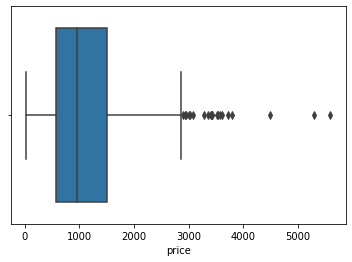

In [19]:
sns.boxplot(sum_check_gr0.price)

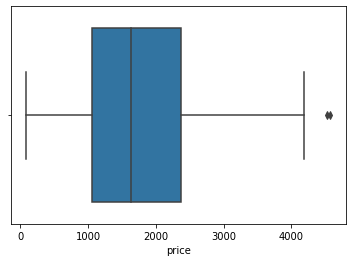

In [20]:
sns.boxplot(sum_check_gr1.price)

In [21]:
stats.mannwhitneyu(sum_check_gr0.price, sum_check_gr1.price)
# pvalue сильно меньше 0.05

MannwhitneyuResult(statistic=75129.0, pvalue=3.678775432886667e-30)

In [22]:
stats.ttest_ind(sum_check_gr0.price, sum_check_gr1.price)
# Хочется проверить и другими тестами=) ttest

Ttest_indResult(statistic=-11.225235903309475, pvalue=1.2229806926590051e-27)

In [220]:
stats.f_oneway(sum_check_gr0.price, sum_check_gr1.price)
# И anova

F_onewayResult(statistic=126.00592108494807, pvalue=1.2229806926593488e-27)

In [ ]:
# Все тесты (Манна-Уитни, ттест, анова) показали, что мы имеем стохастические и статзначимые различия между группами.

In [ ]:
# То же самое проделаем для кол-ва купленных товаров на пользователя

In [23]:
sum_products_gr0 = orders_users_products.query('group == "0"') \
.groupby('user_id', as_index = False) \
.agg({'product_id' : 'count'})
sum_products_gr0

,user_id,product_id
0,964,8
1,968,11
2,969,8
3,972,5
4,975,11
...,...,...
507,1971,11
508,1972,11
509,1973,10
510,1974,14


In [24]:
sum_products_gr0.describe()

,user_id,product_id
count,512.000000,512.000000
mean,1480.130859,9.966797
std,295.679807,6.454786
min,964.000000,1.000000
25%,1225.500000,5.000000
50%,1470.500000,9.000000
75%,1736.250000,13.000000
max,1975.000000,43.000000


In [25]:
sum_products_gr1 = orders_users_products.query('group == "1"') \
.groupby('user_id', as_index = False) \
.agg({'product_id' : 'count'})
sum_products_gr1

,user_id,product_id
0,965,33
1,967,18
2,970,7
3,971,19
4,973,8
...,...,...
496,1976,16
497,1977,9
498,1978,19
499,1979,21


In [26]:
sum_products_gr1.describe()

,user_id,product_id
count,501.000000,501.000000
mean,1465.173653,15.928144
std,290.914681,7.618322
min,965.000000,1.000000
25%,1212.000000,11.000000
50%,1479.000000,15.000000
75%,1706.000000,20.000000
max,1980.000000,44.000000


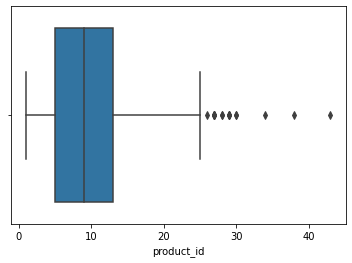

In [27]:
sns.boxplot(sum_products_gr0.product_id)

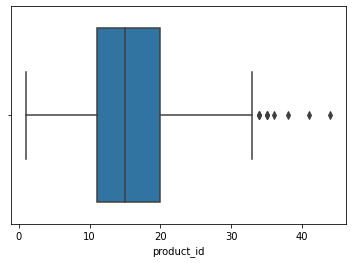

In [28]:
sns.boxplot(sum_products_gr1.product_id)

In [ ]:
# Также наблюдаем выбросы. Проведем те же тесты.

In [29]:
stats.mannwhitneyu(sum_products_gr0.product_id, sum_products_gr1.product_id)

MannwhitneyuResult(statistic=66814.5, pvalue=7.718513188000197e-40)

In [30]:
stats.ttest_ind(sum_products_gr0.product_id, sum_products_gr1.product_id)

Ttest_indResult(statistic=-13.447531897806387, pvalue=4.795189289548436e-38)

In [229]:
stats.f_oneway(sum_products_gr0.product_id, sum_products_gr1.product_id)

F_onewayResult(statistic=180.83611414252013, pvalue=4.795189289550154e-38)

In [ ]:
# С кол-ом купленных товаров на пользователя ситуация аналогичная. Имеем стохастические и статзначимые различия между группами.

In [ ]:
# Посмотрим на количество отмененных заказов по группам

In [31]:
status_order = pd.read_csv('ab_users_data.csv')
status_order

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37.000000,2022-08-26,1
...,...,...,...,...,...,...
4332,990,59422,create_order,2022-09-08 23:13:03.000000,2022-09-08,1
4333,1418,59439,create_order,2022-09-08 23:18:05.000000,2022-09-08,1
4334,1605,59464,create_order,2022-09-08 23:22:27.000000,2022-09-08,0
4335,1461,59487,create_order,2022-09-08 23:29:06.000000,2022-09-08,0


In [32]:
status_order.order_id = status_order.order_id.drop_duplicates(keep= 'last')
status_order = status_order.dropna()
# Удалим строки со значением в action 'create_order' тех заказов, которые были отменены.

In [33]:
status_order

,user_id,order_id,action,time,date,group
0,964,1255.0,create_order,2022-08-26 00:00:19.000000,2022-08-26,0
1,965,1256.0,create_order,2022-08-26 00:02:21.000000,2022-08-26,1
2,964,1257.0,create_order,2022-08-26 00:02:27.000000,2022-08-26,0
4,967,1259.0,create_order,2022-08-26 00:03:37.000000,2022-08-26,1
5,968,1261.0,create_order,2022-08-26 00:05:35.000000,2022-08-26,0
...,...,...,...,...,...,...
4332,990,59422.0,create_order,2022-09-08 23:13:03.000000,2022-09-08,1
4333,1418,59439.0,create_order,2022-09-08 23:18:05.000000,2022-09-08,1
4334,1605,59464.0,create_order,2022-09-08 23:22:27.000000,2022-09-08,0
4335,1461,59487.0,create_order,2022-09-08 23:29:06.000000,2022-09-08,0


In [34]:
pd.crosstab(status_order.action, status_order.group)
# Сделаем таблицу сопряженности

group,0,1
action,,
cancel_order,82,132
create_order,1527,2382


In [35]:
chi2_contingency(pd.crosstab(status_order.action, status_order.group))
# Прверим с помощью хи-квадрата

(0.02127420729029518,
 0.8840344321879333,
 1,
 array([[  83.51346107,  130.48653893],
        [1525.48653893, 2383.51346107]]))

In [ ]:
# Здесь видим, что взаимосвязи между отменой заказа и группой нет.

In [ ]:
# По результатам тестов мы видим, что в группе 1 сумма заказа пользователя и кол-во купленных товаров значимо больше, поэтому
# новую систему рекомендаций можно включать на всех пользователей.